In [1956]:
#Install Packages

#pip install openpyxl
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install simplejson

In [1957]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [1958]:
# Load variables from the DataAnalysis file

with open('DataAnalysisVariables.pkl', 'rb') as f:
    data = pickle.load(f)

In [1959]:
# Load variables from the Global_Variables file

with open('Global_Variables.pkl', 'rb') as f:
    Global_Variables = pickle.load(f)

In [1960]:
#Assumptions from CHE Report

#BTC Mining
#Basis_MW = data['Basis_MW'] #MW
#Hardware_Eff = data['Hardware_Eff'] #Percentage
#W_from_Renewables = data['W_from_Renewables'] #GW
#P_from_Renewables = data['P_from_Renewables'] #GW
#P_from_Solar = data['P_from_Solar']
#Solar_Surplus = data['Solar_Surplus'] #Percentage of excess energy produced by Solar Energy
#Solar_Plant_W = data['Solar_Plant_W'] #GW

#Solar Plant
#PV_Capacity = data['PV_Capacity'] #MW Maximum capacity
Capital_Cost_PV = Global_Variables['Capital_Cost_PV'] #$
#PV_Plant_Cost = data['PV_Plant_Cost'] #$
Electricity_Cost_USD = Global_Variables['Electricity_Cost_USD']

#Calculations based on Assumptions
#W_from_Solar = data['W_from_Solar']
#Global_W = data['Global_W']

#Date of data extraction from Blockchain.com
last_date = Global_Variables['last_date']

In [1961]:
#Calculated in Data Analysis file
NumberofRigsPerModel = data['NumberofRigsPerModel']
df_PV = data['df_PV_copy']

In [1962]:
#Data used as basis
Crypto_Data = Global_Variables['Crypto_Data']
ASIC_df = Crypto_Data

#Bitcoin Data
hashrate_BTC = Global_Variables['hashrate_BTC']
revenue_BTC = Global_Variables['revenue_BTC']

#JSON file paths
file_paths = [hashrate_BTC,revenue_BTC]

In [1963]:
#Considering that 
ASIC_df['NumberOfRigs'] = ASIC_df['Model'].map(NumberofRigsPerModel)

ASIC_df['Total Hashrate (Th/s)'] = ASIC_df['Hashrate (Th/s)']*ASIC_df['NumberOfRigs']

#Once off
ASIC_df['CapitalCost (000 $)'] = ASIC_df['NumberOfRigs']*ASIC_df['Price ($)']/1000

ASIC_df = ASIC_df[ASIC_df['Rig Type'] == 'ASIC']

ASIC_df.head()

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29569.0,11531910.0,368104.481
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900
3,MicroBT WhatsMiner M66S,01-Nov-23,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,38697.0,11531706.0,373387.353
4,Bitmain Antminer S21 Pro (234Th),01-Jul-24,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,60418.0,14137812.0,303842.122


In [1964]:
ASIC_df.columns

Index(['Model', 'Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)', 'With Electricity',
       'Without Electricity', 'Efficiency (j/Gh)', 'Price ($)', 'Noise db',
       'Cooling', 'Seller', 'Days to Breakeven', 'Rig Type', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)'],
      dtype='object')

In [1965]:
temp_ASIC_df = ASIC_df.copy()

In [1966]:
old_column_names = ['Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)',
       'With Electricity', 'Without Electricity',
       'Efficiency (j/Gh)', 'Price ($)', 'Noise db', 'Cooling', 'Seller',
       'Days to Breakeven', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)']

new_column_names = ['Release', 'Hashrate(Th/s)','Power(W)','Algorithm',
        'Income($/day)','ElectricityCost($/day)',
        'WithElectricity','WithoutElectricity',
        'Efficiency(j/Gh)','Price($)','Noisedb','Cooling','Seller',
        'DaystoBreakeven','NumberOfRigs',
        'TotalHashrate(Th/s)','CapitalCost(000)']

In [1967]:
temp_ASIC_df[new_column_names] = temp_ASIC_df[old_column_names]

dicts = {}

for col in new_column_names:
    dict_name = f"dict_{col}"
    dicts[dict_name] = temp_ASIC_df.set_index('Model')[col].to_dict()

for name, dictionary in dicts.items():
    print(f"{name} -> {dictionary}")


dict_Release -> {'MicroBT WhatsMiner M63S': '01-Nov-23', 'Bitmain Antminer S21 Hyd (335Th)': '01-Feb-24', 'MicroBT WhatsMiner M63': '01-Nov-23', 'MicroBT WhatsMiner M66S': '01-Nov-23', 'Bitmain Antminer S21 Pro (234Th)': '01-Jul-24', 'Bitmain Antminer S21 (200Th)': '01-Feb-24', 'Bitmain Antminer T21 (190Th)': '01-Feb-24', 'MicroBT WhatsMiner M60S': '01-Feb-24', 'Canaan Avalon A1566': '01-Oct-24', 'MicroBT WhatsMiner M60': '01-Feb-24', 'Bitmain Antminer S19j Pro (104Th)': '01-Jul-21', 'Bitmain Antminer S19 Pro (110Th)': '01-May-20'}
dict_Hashrate(Th/s) -> {'MicroBT WhatsMiner M63S': 390.0, 'Bitmain Antminer S21 Hyd (335Th)': 335.0, 'MicroBT WhatsMiner M63': 334.0, 'MicroBT WhatsMiner M66S': 298.0, 'Bitmain Antminer S21 Pro (234Th)': 234.0, 'Bitmain Antminer S21 (200Th)': 200.0, 'Bitmain Antminer T21 (190Th)': 190.0, 'MicroBT WhatsMiner M60S': 186.0, 'Canaan Avalon A1566': 185.0, 'MicroBT WhatsMiner M60': 172.0, 'Bitmain Antminer S19j Pro (104Th)': 104.0, 'Bitmain Antminer S19 Pro (110Th

In [1968]:
#Function to read JSON files
def read_and_print_json(file_path):

    with open(file_path, 'r') as file:
        json_data = json.load(file)

    print(json_data)
    
    return json_data

In [1969]:
#Function to convert json data to Dataframe
def process_data(category_y,category_x,json_data):
    time_series_data = json_data[category_y]

    df = pd.DataFrame(time_series_data)
    df[category_x] = df['x']
    df[category_y] = df['y']
    return df

In [1970]:
#Function to add column with dates to the data
def add_dates(df,last_date):

    num_rows = df.shape[0]
    dates = pd.date_range(end=last_date, periods=num_rows)
    df['Date'] = dates

    return df

In [1971]:
#Function to plot graphs for data visualization
def plot_graph(df,y_data,title,y_label):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = df['Date']
    y = df[y_data]

    plt.plot(x, y, color='red')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


{'metric1': 'miners-revenue', 'metric2': 'market-price', 'miners-revenue': [{'x': 1698451200000, 'y': 31018704.384994347}, {'x': 1698537600000, 'y': 31869663.034045357}, {'x': 1698624000000, 'y': 32053239.592004847}, {'x': 1698710400000, 'y': 32663988.681133866}, {'x': 1698796800000, 'y': 33441948.513665527}, {'x': 1698883200000, 'y': 33470161.096744664}, {'x': 1698969600000, 'y': 33484481.368150137}, {'x': 1699056000000, 'y': 32987416.154812064}, {'x': 1699142400000, 'y': 33831315.08251717}, {'x': 1699228800000, 'y': 34970491.281359695}, {'x': 1699315200000, 'y': 34304247.065032534}, {'x': 1699401600000, 'y': 34048475.964370735}, {'x': 1699488000000, 'y': 34650644.88509359}, {'x': 1699574400000, 'y': 35941397.8715662}, {'x': 1699660800000, 'y': 37521879.87848707}, {'x': 1699747200000, 'y': 37752398.46864532}, {'x': 1699833600000, 'y': 38600137.92737014}, {'x': 1699920000000, 'y': 38808396.61609398}, {'x': 1700006400000, 'y': 39203968.35652012}, {'x': 1700092800000, 'y': 39445757.50334

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_35464\363746229.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


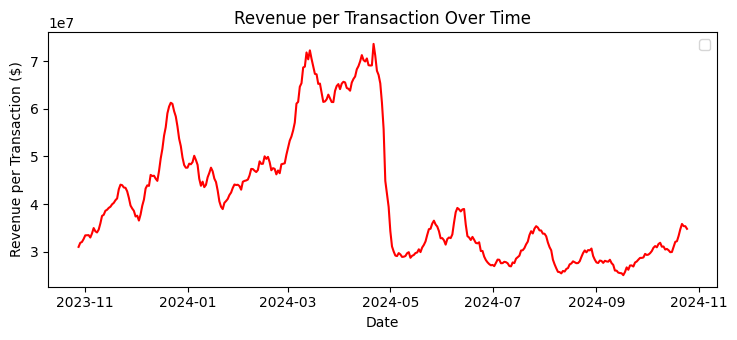

In [1972]:
#Daily transaction_revenue to BTC miners across the globe
file_path = revenue_BTC
json_data = read_and_print_json(file_path)

category_y = 'miners-revenue'
category_x = 'Revenue (USD)'
df_revenue = process_data(category_y,category_x,json_data)

df_revenue = add_dates(df_revenue,last_date)

print(df_revenue.head())

y_data = 'y'
title = 'Revenue per Transaction Over Time'
y_label = 'Revenue per Transaction ($)'
plot_graph(df_revenue,y_data,title,y_label)

{'metric1': 'hash-rate', 'metric2': 'market-price', 'hash-rate': [{'x': 1698451200000, 'y': 448143230.48629}, {'x': 1698537600000, 'y': 452477304.2820955}, {'x': 1698624000000, 'y': 445542786.2088067}, {'x': 1698710400000, 'y': 446432116.97122365}, {'x': 1698796800000, 'y': 460578041.84067196}, {'x': 1698883200000, 'y': 464261140.1474795}, {'x': 1698969600000, 'y': 463125882.7349779}, {'x': 1699056000000, 'y': 456708337.497233}, {'x': 1699142400000, 'y': 461884981.20968944}, {'x': 1699228800000, 'y': 474812083.2106728}, {'x': 1699315200000, 'y': 462212744.476483}, {'x': 1699401600000, 'y': 452453934.13244975}, {'x': 1699488000000, 'y': 452453934.13244975}, {'x': 1699574400000, 'y': 452010351.8440846}, {'x': 1699660800000, 'y': 459994833.0346573}, {'x': 1699747200000, 'y': 456446174.72773606}, {'x': 1699833600000, 'y': 456439922.31436163}, {'x': 1699920000000, 'y': 455681828.07999325}, {'x': 1700006400000, 'y': 460070558.7815174}, {'x': 1700092800000, 'y': 461955101.49630696}, {'x': 170

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_35464\363746229.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


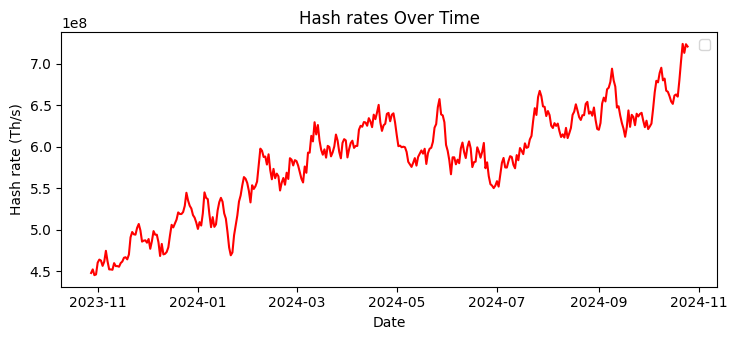

In [1973]:
#Daily hasrates to BTC miners across the globe
file_path = hashrate_BTC
json_data = read_and_print_json(file_path)

category_y = 'hash-rate'
category_x = 'Revenue (USD)'
df_hr = process_data(category_y,category_x,json_data)

df_hr = add_dates(df_hr,last_date)

print(df_hr.head())

y_data = 'y'
title = 'Hash rates Over Time'
y_label = 'Hash rate (Th/s)'
plot_graph(df_hr,y_data,title,y_label)

In [1974]:
#hash-rate in Th/s
#miners-revenue in USD

df = pd.merge(df_hr[['Date', 'hash-rate']], df_revenue[['Date', 'miners-revenue']], on='Date', how='inner')

df.head()


,Date,hash-rate,miners-revenue
0,2023-10-28,4.481432e+08,3.101870e+07
1,2023-10-29,4.524773e+08,3.186966e+07
2,2023-10-30,4.455428e+08,3.205324e+07
3,2023-10-31,4.464321e+08,3.266399e+07
4,2023-11-01,4.605780e+08,3.344195e+07


In [1975]:
df.tail()

,Date,hash-rate,miners-revenue
359,2024-10-21,7.027137e+08,3.471964e+07
360,2024-10-22,7.236317e+08,3.583560e+07
361,2024-10-23,7.128173e+08,3.537913e+07
362,2024-10-24,7.232393e+08,3.535770e+07
363,2024-10-25,7.204847e+08,3.481178e+07


In [1976]:
df['revenue per hashrate'] = df['miners-revenue'] /df['hash-rate']
df.head()

,Date,hash-rate,miners-revenue,revenue per hashrate
0,2023-10-28,4.481432e+08,3.101870e+07,0.069216
1,2023-10-29,4.524773e+08,3.186966e+07,0.070434
2,2023-10-30,4.455428e+08,3.205324e+07,0.071942
3,2023-10-31,4.464321e+08,3.266399e+07,0.073167
4,2023-11-01,4.605780e+08,3.344195e+07,0.072609


In [1977]:
df_PV.head(15)

,Date,Hour,Energy for Mining (MW),Month,MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th)
0,2024-01-01,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-01-01,1,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2024-01-01,2,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2024-01-01,3,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2024-01-01,4,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2024-01-01,5,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
6,2024-01-01,6,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
7,2024-01-01,7,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
8,2024-01-01,8,47.299103,1,6556,8825,7117,8580,13396,13324,13103,13746,13831,13823,15417,14554
9,2024-01-01,9,112.589045,1,15605,21006,16941,20423,31886,31716,31189,32720,32921,32902,36698,34643


In [1978]:

# Read the dictionary dict_Hashrate
dict_Hashrate = dicts['dict_Hashrate(Th/s)']

# Multiple the hashrate of each model by the corresponding column in df_PV
for column in df_PV.columns:
    if column in dict_Hashrate: 
        df_PV[column] = df_PV[column] * dict_Hashrate[column]

In [1979]:
df_PV.head()

,Date,Hour,Energy for Mining (MW),Month,MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th)
0,2024-01-01,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-01,3,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-01,4,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1980]:


# Assume that hourly 'revenue per hashrate' stays constant per hour
df_new = df.copy()
df_new['revenue per hashrate'] = df_new['revenue per hashrate']/24

# Merge both dataframes on 'Date'
merged_df = df_PV.merge(df_new[['Date', 'revenue per hashrate']], on='Date', how='left')


# Multiply each column (excluding 'Date' and 'revenue per hashrate') by 'revenue per hashrate'
for column in merged_df.columns:
    if column not in ['Date', 'revenue per hashrate']:
        merged_df[column] = merged_df[column] * merged_df['revenue per hashrate']

# Sum up all the daily revenues per model
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df = merged_df.groupby("Date", as_index=False).sum()

df = merged_df.copy()
df.head()

,Date,Hour,Energy for Mining (MW),Month,MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th),revenue per hashrate
0,2024-01-01,1.093477,4.982027,0.095085,269305.484884,311382.229676,250379.106235,269304.803442,330163.243211,280680.539840,262215.790812,269301.015890,269499.359182,250415.056279,168884.034024,168624.721455,0.095085
1,2024-01-02,1.094810,4.972377,0.095201,268784.507023,310779.845058,249896.061530,268782.039733,329523.394782,280136.579592,261708.700183,268780.865589,268977.407845,249930.286254,168557.349312,168297.538125,0.095201
2,2024-01-03,1.100711,5.288484,0.095714,285872.331038,330535.150651,265784.667526,285870.767709,350473.296880,297945.818732,278344.502148,285866.396768,286076.580795,265818.191366,179272.478475,178996.646585,0.095714
3,2024-01-04,1.079306,5.070484,0.093853,274086.013869,316911.313187,254828.597586,274085.090984,336026.988431,285664.152060,266870.931225,274083.925646,274283.691116,254860.382366,171882.739878,171618.497604,0.093853
4,2024-01-05,1.057781,5.064103,0.091981,273743.702783,316513.770585,254504.552788,273739.019417,335602.389859,285305.099945,266534.577761,273738.988757,273939.143222,254540.387048,171666.266765,171402.434627,0.091981


In [1981]:


model_sums = {model: df[model].sum() for model in dict_Hashrate.keys()}

Yearly_revenue_perModel = pd.DataFrame(list(model_sums.items()), columns=['Model', 'Annual_Sum'])

Yearly_revenue_perModel.head()


,Model,Annual_Sum
0,MicroBT WhatsMiner M63S,3.993124e+07
1,Bitmain Antminer S21 Hyd (335Th),4.617012e+07
2,MicroBT WhatsMiner M63,3.712527e+07
3,MicroBT WhatsMiner M66S,3.993095e+07
4,Bitmain Antminer S21 Pro (234Th),4.895488e+07


In [1982]:
ASIC_df.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29569.0,11531910.0,368104.481
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900


In [1983]:
dict_CapitalCost= dicts['dict_CapitalCost(000)']

In [1984]:
Yearly_revenue_perModel['Capital_Cost ($000)'] = Yearly_revenue_perModel['Model'].map(dict_CapitalCost)
Yearly_revenue_perModel['Capital_Cost'] = Yearly_revenue_perModel['Capital_Cost ($000)']*1000

Yearly_revenue_perModel['Payback_Period'] = Yearly_revenue_perModel['Capital_Cost']/Yearly_revenue_perModel['Annual_Sum']
Yearly_revenue_perModel.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,3.993124e+07,368104.481,368104481.0,9.218459
1,Bitmain Antminer S21 Hyd (335Th),4.617012e+07,234388.089,234388089.0,5.076619
2,MicroBT WhatsMiner M63,3.712527e+07,220815.900,220815900.0,5.947860
3,MicroBT WhatsMiner M66S,3.993095e+07,373387.353,373387353.0,9.350825
4,Bitmain Antminer S21 Pro (234Th),4.895488e+07,303842.122,303842122.0,6.206575


In [1985]:
ASIC_df = ASIC_df.merge(Yearly_revenue_perModel[['Model', 'Payback_Period']], on='Model')
ASIC_df.head()


,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $),Payback_Period
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29569.0,11531910.0,368104.481,9.218459
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089,5.076619
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900,5.947860
3,MicroBT WhatsMiner M66S,01-Nov-23,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,38697.0,11531706.0,373387.353,9.350825
4,Bitmain Antminer S21 Pro (234Th),01-Jul-24,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,60418.0,14137812.0,303842.122,6.206575


In [1986]:
# Identify the model with the minimum payback period
min_payback_idx = ASIC_df['Payback_Period'].idxmin()
min_payback_row = ASIC_df.loc[min_payback_idx]

min_payback_model = min_payback_row['Model']
min_payback_value = min_payback_row['Payback_Period']
min_payback_releasedate = min_payback_row['Release']

# Display the model with the minimum payback period and its value
print(f"Model with minimum payback period: {min_payback_model}")
print(f"Release Date of Model with minimum payback period: {min_payback_releasedate}")
print(f"Minimum payback period: {min_payback_value}")

Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.131822730738389


C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_35464\180183589.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ASIC_df['Release'] = pd.to_datetime(ASIC_df['Release'])


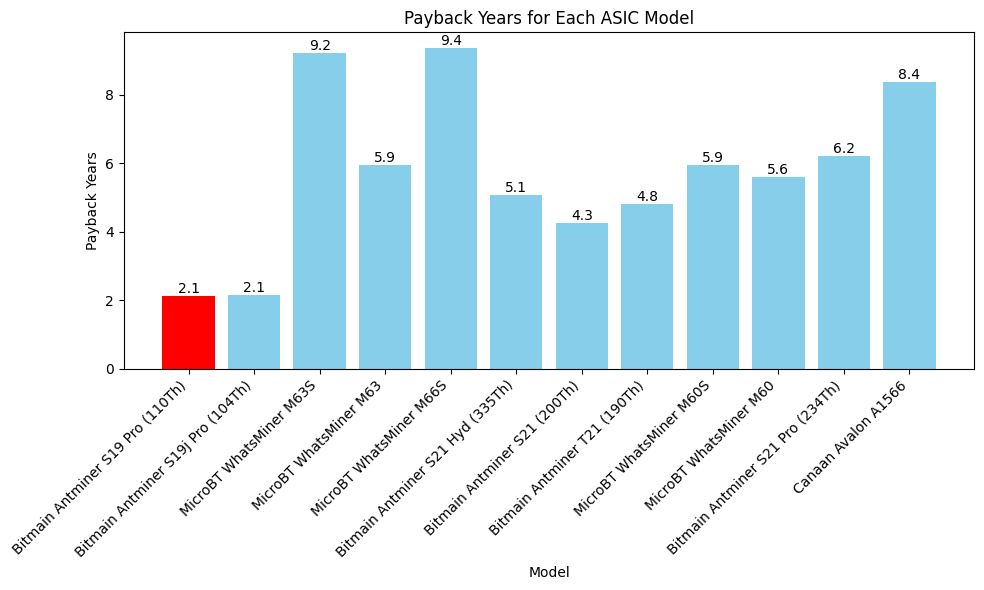

In [1987]:
# Ensure the 'Release' column is in datetime format if it's not already
ASIC_df['Release'] = pd.to_datetime(ASIC_df['Release'])

# Sort the DataFrame by 'Release'
ASIC_df_sorted = ASIC_df.sort_values(by='Release')

# Define colors for bars, highlighting the minimum payback period model
min_payback_idx = ASIC_df_sorted['Payback_Period'].idxmin()
colors = ['red' if i == min_payback_idx else 'skyblue' for i in ASIC_df_sorted.index]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(ASIC_df_sorted['Model'], ASIC_df_sorted['Payback_Period'], color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Payback Years')
plt.title('Payback Years for Each ASIC Model')

# Add payback period numbers on top of each bar, formatted to 1 decimal place
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')  # Payback period value

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [1988]:
cheaper_model = Yearly_revenue_perModel[Yearly_revenue_perModel['Model'] == min_payback_model]
cheaper_model

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
11,Bitmain Antminer S19 Pro (110Th),2.500269e+07,53301.304,53301304.0,2.131823


In [1989]:
ASIC_df.head()

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $),Payback_Period
0,MicroBT WhatsMiner M63S,2023-11-01,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29569.0,11531910.0,368104.481,9.218459
1,Bitmain Antminer S21 Hyd (335Th),2024-02-01,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089,5.076619
2,MicroBT WhatsMiner M63,2023-11-01,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900,5.947860
3,MicroBT WhatsMiner M66S,2023-11-01,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,38697.0,11531706.0,373387.353,9.350825
4,Bitmain Antminer S21 Pro (234Th),2024-07-01,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,60418.0,14137812.0,303842.122,6.206575


In [1990]:
Yearly_revenue_perModel = Yearly_revenue_perModel[Yearly_revenue_perModel['Annual_Sum'] != 0]


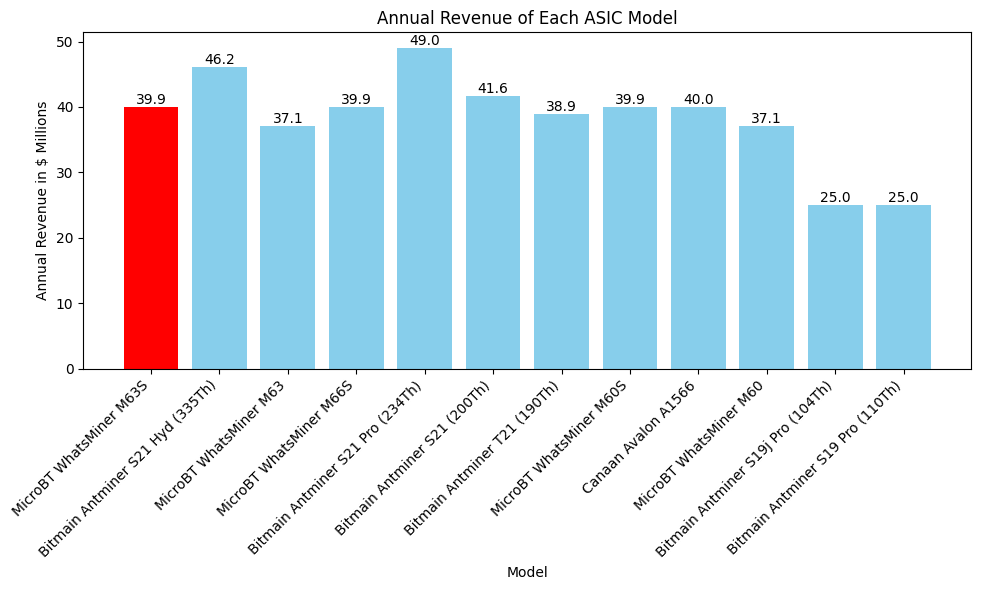

In [1991]:
Yearly_revenue_perModel = Yearly_revenue_perModel[Yearly_revenue_perModel['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000), color=colors)
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


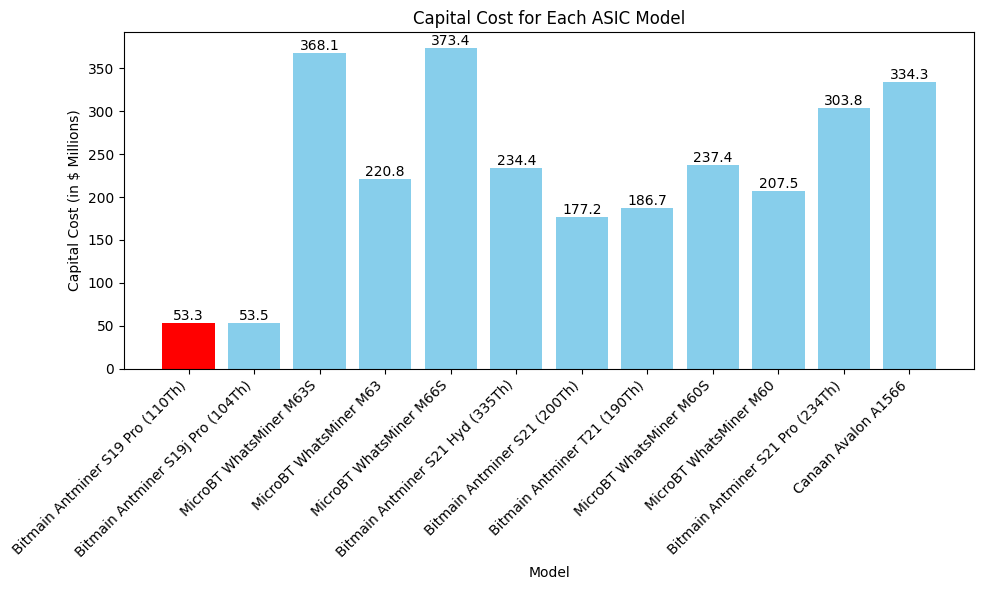

In [1992]:
# Ensure the 'Release' column is in datetime format if it's not already
ASIC_df['Release'] = pd.to_datetime(ASIC_df['Release'])

# Sort the DataFrame by 'Release'
ASIC_df_sorted = ASIC_df.sort_values(by='Release')

ASIC_df_sorted['CapitalCost ($)'] = ASIC_df_sorted['CapitalCost (000 $)']/1000
# Define colors for bars, highlighting the minimum payback period model
min_payback_idx = ASIC_df_sorted['CapitalCost ($)'].idxmin()
colors = ['red' if i == min_payback_idx else 'skyblue' for i in ASIC_df_sorted.index]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(ASIC_df_sorted['Model'], ASIC_df_sorted['CapitalCost ($)'], color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Capital Cost (in $ Millions)')
plt.title('Capital Cost for Each ASIC Model')

# Add payback period numbers on top of each bar, formatted to 1 decimal place
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')  # Payback period value

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
